In [1]:
import datajoint as dj
import numpy as np
import tifffile as tf
import matplotlib.pyplot as plt
import retinotopic_mapping
import retinotopic_mapping.tools.FileTools as ft
import retinotopic_mapping.RetinotopicMapping as rm

ModuleNotFoundError: No module named 'retinotopic_mapping'

In [79]:
# Set up your connection to the database server
dj.config['database.host'] = '139.91.171.210:3306'
dj.config['database.user'] = 'eflab'
dj.config['database.password'] = 'cajal123'

dj.conn()

DataJoint connection (connected) eflab@139.91.171.210:3306

In [80]:
# list the names of database schemas available to you
dj.list_schemas()

['common_lab',
 'common_mice',
 'manolis_beh_analysis',
 'manolis_objects',
 'mysql',
 'performance_schema',
 'pipeline_anatomy',
 'pipeline_behavior',
 'pipeline_experiment',
 'pipeline_eye',
 'pipeline_fuse',
 'pipeline_map',
 'pipeline_meso',
 'pipeline_reso',
 'pipeline_stimulus',
 'pipeline_sync',
 'pipeline_tune',
 'tutorial',
 'vis2p_manolis']

In [ ]:
map = dj.create_virtual_module(‘map.py’, ‘pipeline_map’)

In [ ]:
behavior = dj.create_virtual_module(‘behavior.py’, ‘pipeline_behavior’)

In [81]:
# we start by creating a schema object to connect to the chosen database schema
schema = dj.schema('pipeline_anatomy')
# schema = dj.schema('tutorial', locals())
# If the schema already exists, dj.schema is initialized as usual and you may plot the schema diagram.
# But instead of seeing class names, you will see the raw table names as they appear in the database.

In [82]:
# let's plot its diagram -- gives error!!
#dj.Diagram(schema)

In [83]:
dj.config['display.limit'] = 40 

In [84]:
# to spawn classes into the local namespace for any tables missing their classes
schema.spawn_missing_classes()

In [85]:
ref_map = RefMap()
ref_map

animal_id id number,ref_idx number of reference index for each animal,session session index for the mouse,scan_idx number of TIFF stack file,pxpitch estimated pixel pitch of the reference map (px),ref_table reference table,ref_map reference map
9254,1,1,4,7.421875,map.OptImageBar,=BLOB=
9329,1,1,6,7.421875,map.OptImageBar,=BLOB=
9508,1,1,5,7.421875,map.OptImageBar,=BLOB=
9579,1,1,6,7.421875,map.OptImageBar,=BLOB=
9580,1,2,5,7.421875,map.OptImageBar,=BLOB=
10417,1,1,7,7.421875,map.OptImageBar,=BLOB=
10566,1,1,9,7.421875,map.OptImageBar,=BLOB=
10577,1,1,7,7.421875,map.OptImageBar,=BLOB=
10577,2,1,4,7.421875,map.OptImageBar,=BLOB=
10578,1,2,5,7.421875,map.OptImageBar,=BLOB=


In [232]:
# query data for animal 9254 only
query = ref_map & 'animal_id = 9329'
query

animal_id id number,ref_idx number of reference index for each animal,session session index for the mouse,scan_idx number of TIFF stack file,pxpitch estimated pixel pitch of the reference map (px),ref_table reference table,ref_map reference map
9329,1,1,6,7.421875,map.OptImageBar,=BLOB=


In [233]:
r_map = query.fetch1('ref_map')

In [234]:
r_map

array([[   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [2505.682 , 2458.4546, 2426.1135, ..., 4008.2273, 3965.2273,
        3944.1135],
       [2456.    , 2413.8408, 2413.4092, ..., 4006.7727, 3991.0227,
        3918.432 ],
       ...,
       [4095.    , 4095.    , 4095.    , ..., 4095.    , 4095.    ,
        4095.    ],
       [4095.    , 4095.    , 4095.    , ..., 4095.    , 4095.    ,
        4095.    ],
       [4095.    , 4095.    , 4095.    , ..., 4095.    , 4095.    ,
        4095.    ]], dtype=float32)

[]

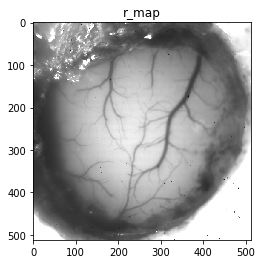

In [235]:
plt.imshow(r_map, cmap='gray', interpolation='nearest')
plt.title('r_map')
plt.plot()


In [14]:
field_coordinates = FieldCoordinates()
field_coordinates

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,ref_idx reference map index for each animal,field slice id,x_offset x center coordinate in pixels,y_offset y center coordinate in pixels,field_depth depth of slice from surface in microns,"tform transformation matrix for rotation,scale,flip relative to vessel map",pxpitch estimated pixel pitch of the reference map (px)
9254,1,1,1,1,-13.61394959134716,-66.22121524565604,165.0,=BLOB=,8.221875
9254,1,1,1,2,-13.61394959134716,-66.22121524565604,159.5,=BLOB=,8.221875
9254,1,1,1,3,-13.61394959134716,-66.22121524565604,145.0,=BLOB=,8.221875
9254,1,2,1,1,-58.69797362928691,-0.1078821446996625,199.0,=BLOB=,8.433186560384492
9254,1,2,1,2,-58.69797362928691,-0.1078821446996625,183.5,=BLOB=,8.433186560384492
9254,1,2,1,3,-58.69797362928691,-0.1078821446996625,169.0,=BLOB=,8.433186560384492
9254,2,1,1,1,-106.9937397989488,-4.925598635770892,185.0,=BLOB=,8.818482723600594
9254,2,1,1,2,-106.9937397989488,-4.925598635770892,170.0,=BLOB=,8.818482723600594
9254,2,1,1,3,-106.9937397989488,-4.925598635770892,155.0,=BLOB=,8.818482723600594
9254,2,2,1,1,5.681867883022238,-126.0343599899154,205.0,=BLOB=,7.699791315664106


In [68]:
query = field_coordinates & 'animal_id = 9254'
query

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,ref_idx reference map index for each animal,field slice id,x_offset x center coordinate in pixels,y_offset y center coordinate in pixels,field_depth depth of slice from surface in microns,"tform transformation matrix for rotation,scale,flip relative to vessel map",pxpitch estimated pixel pitch of the reference map (px)
9254,1,1,1,1,-13.61394959134716,-66.22121524565604,165.0,=BLOB=,8.221875
9254,1,1,1,2,-13.61394959134716,-66.22121524565604,159.5,=BLOB=,8.221875
9254,1,1,1,3,-13.61394959134716,-66.22121524565604,145.0,=BLOB=,8.221875
9254,1,2,1,1,-58.69797362928691,-0.1078821446996625,199.0,=BLOB=,8.433186560384492
9254,1,2,1,2,-58.69797362928691,-0.1078821446996625,183.5,=BLOB=,8.433186560384492
9254,1,2,1,3,-58.69797362928691,-0.1078821446996625,169.0,=BLOB=,8.433186560384492
9254,2,1,1,1,-106.9937397989488,-4.925598635770892,185.0,=BLOB=,8.818482723600594
9254,2,1,1,2,-106.9937397989488,-4.925598635770892,170.0,=BLOB=,8.818482723600594
9254,2,1,1,3,-106.9937397989488,-4.925598635770892,155.0,=BLOB=,8.818482723600594
9254,2,2,1,1,5.681867883022238,-126.0343599899154,205.0,=BLOB=,7.699791315664106


In [69]:
tform = query.fetch('tform')
tform.shape

(12,)

In [75]:
tform[1].shape

(3, 3)

[]

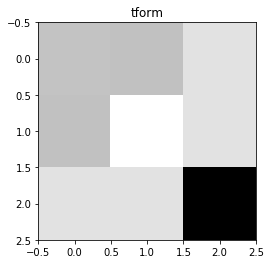

In [72]:
plt.imshow(tform[3], cmap = 'gray', interpolation='nearest')
plt.title('tform')
plt.plot()

In [90]:
masks = Masks()
masks

brain_area area name,mask area mask
A,=BLOB=
AL,=BLOB=
AM,=BLOB=
LI,=BLOB=
LLA,=BLOB=
LM,=BLOB=
P,=BLOB=
PM,=BLOB=
POR,=BLOB=
RL,=BLOB=


In [97]:
query = masks & 'brain_area = "AL"'
query

brain_area area name,mask area mask
AL,=BLOB=


In [133]:
masks_v = masks.fetch('mask')
masks_v.size

11

[]

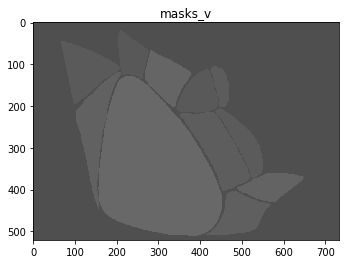

In [144]:
for i in range(masks_v.size):
    plt.imshow(masks_v[i], cmap = 'gray', interpolation='nearest', alpha =0.1)

plt.title('masks_v')
plt.plot()

In [137]:
area_mask = AreaMask()
area_mask

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,brain_area area name,field,ret_idx retinotopy map index for each animal,mask mask of area
9254,1,1,V1,1,1,=BLOB=
9254,1,1,V1,2,1,=BLOB=
9254,1,1,V1,3,1,=BLOB=
9254,1,2,AL,1,1,=BLOB=
9254,1,2,AL,2,1,=BLOB=
9254,1,2,AL,3,1,=BLOB=
9254,1,2,LM,1,1,=BLOB=
9254,1,2,LM,2,1,=BLOB=
9254,1,2,LM,3,1,=BLOB=
9254,1,4,AL,1,1,=BLOB=


In [148]:
query = area_mask & 'animal_id = 9329'
query

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,brain_area area name,field,ret_idx retinotopy map index for each animal,mask mask of area
9329,1,1,V1,1,1,=BLOB=
9329,1,1,V1,2,1,=BLOB=
9329,1,1,V1,3,1,=BLOB=
9329,1,2,AL,1,1,=BLOB=
9329,1,2,AL,2,1,=BLOB=
9329,1,2,AL,3,1,=BLOB=
9329,1,2,RL,1,1,=BLOB=
9329,1,2,RL,2,1,=BLOB=
9329,1,2,RL,3,1,=BLOB=
9329,1,6,AL,1,1,=BLOB=


In [155]:
mask = query.fetch('mask')
mask.shape

(69,)

In [151]:
#mask[10]

[]

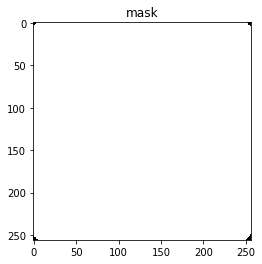

In [230]:
plt.imshow(mask[1], cmap = 'gray', interpolation='nearest')
plt.title('mask')
plt.plot()

[]

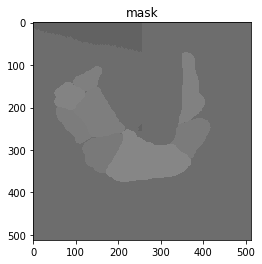

In [231]:
for i in range(8,17):
    plt.imshow(mask[i], cmap = 'gray', interpolation='nearest', alpha =0.1)

plt.title('mask')
plt.plot()

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,pipe_version,segmentation_method,unit_id,brain_area short name for cortical area
9254,1,2,1,3,127,AL
9254,1,2,1,3,128,AL
9254,1,2,1,3,131,AL
9254,1,2,1,3,142,AL
9254,1,2,1,3,143,AL
9254,1,2,1,3,144,AL
9254,1,2,1,3,145,AL
9254,1,2,1,3,146,AL
9254,1,2,1,3,147,AL
9254,1,2,1,3,148,AL
